In [1]:
import paho.mqtt.client
c = paho.mqtt.client.Client()

polemessages = [ ]
def on_message(mosq, obj, msg):
    polemessages.append(msg.payload)
c.on_message = on_message

c.connect("mqtt.local")
c.subscribe("walkingpole/#")

(0, 1)

In [17]:
c.unsubscribe("walkingpole/#")

(4, None)

In [34]:
import time
c.connect("mqtt.local")
c.subscribe("walkingpole/#")
polemessages = [ ]
pmlenprev = 0
t0 = time.time()
while True:
    c.loop()
    if len(polemessages) > pmlenprev + 40:
        pmlenprev = len(polemessages)
        print(pmlenprev)
    if pmlenprev > 20*10:
        break
print(time.time() - t0, "seconds")
c.unsubscribe("walkingpole/#")


41
82
123
164
205
10.444196462631226 seconds


(0, 5)

In [41]:
pandas.read_csv?


In [49]:
import io
pandas.read_csv?


In [56]:
import pandas, io
df = pandas.read_csv(io.BytesIO(b"\n".join(polemessages)), sep=" ", index_col=False, 
                     names=["dt", "las", "tiltx", "tilty", "accz"])
df = df.iloc[100:]

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline

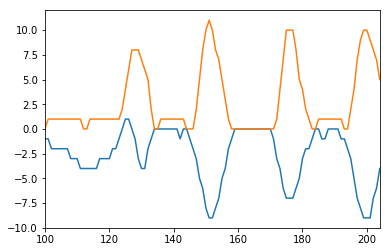

In [57]:
df.tiltx.plot()
df.tilty.plot()


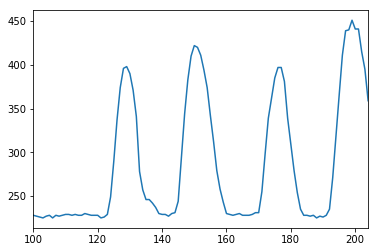

In [62]:
for i in range(len(df)):
    if df.iloc[i].las == 0:
        print(i)
        if df.iloc[i-1].las != 0 and df.iloc[i+1].las != 0:
            df.iloc[i] = (df.iloc[i-1].las + df.iloc[i+1].las)/2
            
df.las.plot()


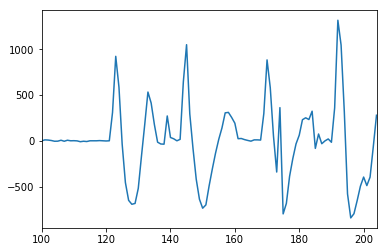

In [63]:
df.accz.plot()

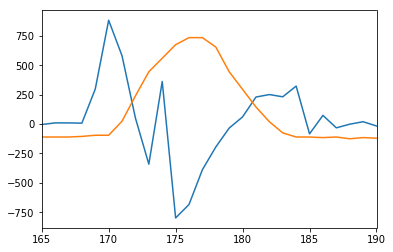

In [70]:
t0, t1 = 165, 190 
df.loc[t0:t1].accz.plot()
((df.loc[t0:t1].las-250)*5).plot()
